In [2]:
import pandas as pd
import json
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from plotnine import *
from matplotlib.lines import Line2D
import df2img
sys.path.append("C:\\Users\\std92\\OneDrive\\文件\\fin_math_110021515\\Price statistics")
import download_binance

import scipy as sci
import statsmodels.formula.api as smf
import statsmodels.api as st
import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn as skl
from datetime import datetime , timedelta
from statsmodels.graphics.tsaplots import plot_acf

# collecting data and check
DOGE, SHIBA, PEPE, Bonk,  WIF, Floki	and TRUMP !!

In [6]:
'''1m,30m,1h,4h,1d '''
    
def download(symbol,period='30m',start= datetime(2015, 1,  1, 0, 0), end =datetime(2025, 1, 28)):
    print(f"Begin downloading: H1-{symbol}")
    df = download_binance.get_data_since(symbol, start, end, period )
    print(f"Download completed: H1-{symbol}")
    print(f"There are {df.close.isna().sum() } N/As in close prices.")

    return df

In [ ]:
token_list=['DOGE','SHIB','PEPE','BONK','WIF','FLOKI','TRUMP']
_ = []
for token in token_list:
    df=download(symbol=token,period = '30m' ).set_index('timestamp')
    df['token'] = token
    _.append(df)

In [10]:
df_meme = pd.concat(_)

C:\Users\std92\AppData\Local\Temp\ipykernel_21700\3830666093.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


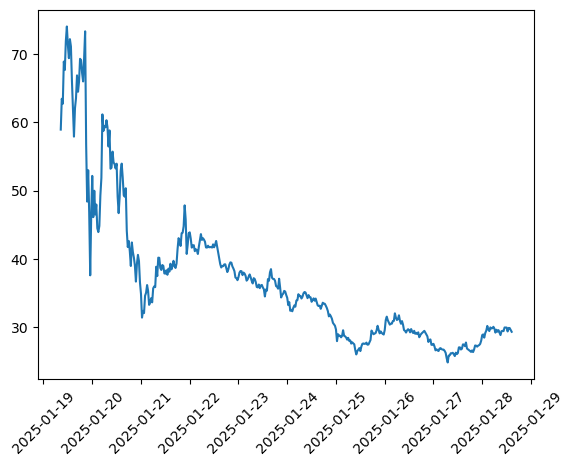

In [30]:
df= df_meme[df_meme.token=='TRUMP'].copy()
plt.plot(df.index,df.close)
plt.xticks(rotation=45);


In [29]:
df_meme.token.unique()

array(['DOGE', 'SHIB', 'PEPE', 'WIF', 'TRUMP', 'BONK', 'FLOKI'],
      dtype=object)

In [50]:
for (token,df) in df_meme.groupby('token'):
    df['diff'] = df.index.diff()
    if (token != 'TRUMP') & (len(df[df['diff'] != '0 days 00:30:00'])>1 ):
        print(token, df[df['diff'] != '0 days 00:30:00'])

DOGE                          open      high       low     close       volume  \
timestamp                                                                  
2019-07-05 12:00:00  0.004490  0.004600  0.003760  0.003810  811186787.0   
2019-08-15 10:00:00  0.002684  0.002684  0.002619  0.002634    7452304.0   
2019-11-13 04:00:00  0.002668  0.002668  0.002658  0.002658      71265.0   
2019-11-25 04:00:00  0.002189  0.002189  0.002142  0.002147    7756602.0   
2020-02-09 03:00:00  0.003246  0.003310  0.003233  0.003300   32150158.0   
2020-02-19 17:30:00  0.002813  0.002824  0.002801  0.002802    5323577.0   
2020-03-04 11:30:00  0.002456  0.002456  0.002408  0.002420   20543613.0   
2020-04-25 04:30:00  0.002080  0.002088  0.002080  0.002080     360853.0   
2020-06-28 05:30:00  0.002292  0.002301  0.002278  0.002300    2809334.0   
2020-11-30 07:00:00  0.003519  0.003561  0.003515  0.003529   12326455.0   
2020-12-21 18:00:00  0.004567  0.005000  0.004567  0.004828  319183509.0   
2020-12

In [51]:
df = df_meme[df_meme.token=='DOGE'].copy()

In [53]:
download()

open      high       low     close       volume  \
timestamp                                                                  
2019-07-05 12:00:00  0.004490  0.004600  0.003760  0.003810  811186787.0   
2019-07-05 12:30:00  0.003823  0.003925  0.003782  0.003925  138243937.0   
2019-07-05 13:00:00  0.003915  0.003928  0.003765  0.003779   83230820.0   
2019-07-05 13:30:00  0.003779  0.003885  0.003766  0.003835   75773447.0   
2019-07-05 14:00:00  0.003845  0.003920  0.003814  0.003864   62066814.0   
...                       ...       ...       ...       ...          ...   
2025-01-28 12:30:00  0.332650  0.332650  0.329710  0.330730   19529987.0   
2025-01-28 13:00:00  0.330720  0.333420  0.330630  0.332970   13850309.0   
2025-01-28 13:30:00  0.332970  0.333280  0.331040  0.331780    9404385.0   
2025-01-28 14:00:00  0.331780  0.331850  0.328270  0.331290   25063842.0   
2025-01-28 14:30:00  0.331280  0.334170  0.330520  0.332690   10808828.0   

                    token            diff  
timestamp                                  
2019-07-05 12:00:00  DOGE             NaT  
2019-07-05 12:30:00  DOGE 0 days 00:30:00  
2019-07-05 13:00:00  DOGE 0 days 00:30:00  
2019-07-05 13:30:00  DOGE 0 days 00:30:00  
2019-07-05 14:00:00  DOGE 0 days 00:30:00  
...                   ...             ...  
2025-01-28 12:30:00  DOGE 0 days 00:30:00  
2025-01-28 13:00:00  DOGE 0 days 00:30:00  
2025-01-28 13:30:00  DOGE 0 days 00:30:00  
2025-01-28 14:00:00  DOGE 0 days 00:30:00  
2025-01-28 14:30:00  DOGE 0 days 00:30:00  

[97540 rows x 7 columns]

In [52]:
df['diff'] = df.index.diff()
df[df['diff'] != '0 days 00:30:00']


open      high       low     close       volume  \
timestamp                                                                  
2019-07-05 12:00:00  0.004490  0.004600  0.003760  0.003810  811186787.0   
2019-08-15 10:00:00  0.002684  0.002684  0.002619  0.002634    7452304.0   
2019-11-13 04:00:00  0.002668  0.002668  0.002658  0.002658      71265.0   
2019-11-25 04:00:00  0.002189  0.002189  0.002142  0.002147    7756602.0   
2020-02-09 03:00:00  0.003246  0.003310  0.003233  0.003300   32150158.0   
2020-02-19 17:30:00  0.002813  0.002824  0.002801  0.002802    5323577.0   
2020-03-04 11:30:00  0.002456  0.002456  0.002408  0.002420   20543613.0   
2020-04-25 04:30:00  0.002080  0.002088  0.002080  0.002080     360853.0   
2020-06-28 05:30:00  0.002292  0.002301  0.002278  0.002300    2809334.0   
2020-11-30 07:00:00  0.003519  0.003561  0.003515  0.003529   12326455.0   
2020-12-21 18:00:00  0.004567  0.005000  0.004567  0.004828  319183509.0   
2020-12-25 03:00:00  0.004480  0.004480  0.004451  0.004460   18440579.0   
2021-02-11 05:00:00  0.072471  0.073300  0.072288  0.072400   76994560.0   
2021-03-06 03:30:00  0.049964  0.050092  0.049705  0.049973   23660264.0   
2021-04-20 04:30:00  0.385068  0.424622  0.385068  0.414458  554980899.0   
2021-04-25 08:30:00  0.276519  0.278750  0.271620  0.274360   70109008.8   
2021-08-13 06:30:00  0.267740  0.275000  0.267740  0.273910   93195485.7   
2021-09-29 09:00:00  0.200500  0.200600  0.199500  0.200500    7664752.0   
2023-03-24 14:00:00  0.075190  0.075210  0.074000  0.074920   40317415.0   

                    token            diff  
timestamp                                  
2019-07-05 12:00:00  DOGE             NaT  
2019-08-15 10:00:00  DOGE 0 days 08:30:00  
2019-11-13 04:00:00  DOGE 0 days 02:30:00  
2019-11-25 04:00:00  DOGE 0 days 02:30:00  
2020-02-09 03:00:00  DOGE 0 days 01:30:00  
2020-02-19 17:30:00  DOGE 0 days 06:00:00  
2020-03-04 11:30:00  DOGE 0 days 02:30:00  
2020-04-25 04:30:00  DOGE 0 days 03:00:00  
2020-06-28 05:30:00  DOGE 0 days 04:00:00  
2020-11-30 07:00:00  DOGE 0 days 01:30:00  
2020-12-21 18:00:00  DOGE 0 days 04:30:00  
2020-12-25 03:00:00  DOGE 0 days 01:30:00  
2021-02-11 05:00:00  DOGE 0 days 01:30:00  
2021-03-06 03:30:00  DOGE 0 days 02:00:00  
2021-04-20 04:30:00  DOGE 0 days 03:00:00  
2021-04-25 08:30:00  DOGE 0 days 04:30:00  
2021-08-13 06:30:00  DOGE 0 days 05:00:00  
2021-09-29 09:00:00  DOGE 0 days 02:30:00  
2023-03-24 14:00:00  DOGE 0 days 01:30:00

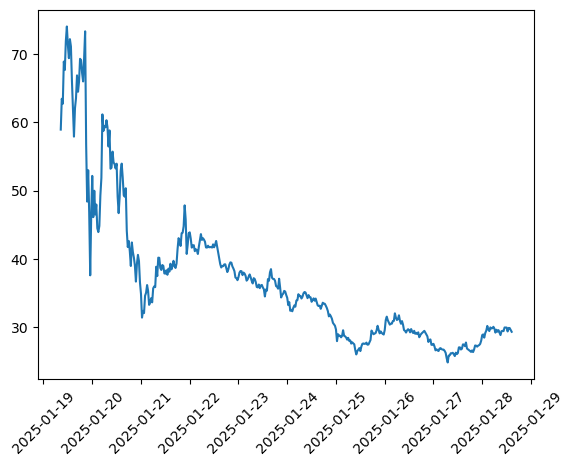

In [28]:
plt.plot(df.index,df.close)
plt.xticks(rotation=45);


In [57]:
_=download('DOGE',start= datetime(2015, 1,  1, 0, 0), end =datetime(2019, 11, 28))


Begin downloading: H1-DOGE
Download completed: H1-DOGE
There are 0 N/As in close prices.


In [65]:
_['diff'] = _.index.diff()
_[_['diff'] != '0 days 00:30:00']


open      high       low     close       volume  \
timestamp                                                                  
2019-07-05 12:00:00  0.004490  0.004600  0.003760  0.003810  811186787.0   
2019-08-15 10:00:00  0.002684  0.002684  0.002619  0.002634    7452304.0   
2019-11-13 04:00:00  0.002668  0.002668  0.002658  0.002658      71265.0   
2019-11-25 04:00:00  0.002189  0.002189  0.002142  0.002147    7756602.0   

                               diff  
timestamp                            
2019-07-05 12:00:00             NaT  
2019-08-15 10:00:00 0 days 08:30:00  
2019-11-13 04:00:00 0 days 02:30:00  
2019-11-25 04:00:00 0 days 02:30:00

In [67]:
_[_.index<'2019-08-15 10:00:00']

open      high       low     close       volume  \
timestamp                                                                  
2019-07-05 12:00:00  0.004490  0.004600  0.003760  0.003810  811186787.0   
2019-07-05 12:30:00  0.003823  0.003925  0.003782  0.003925  138243937.0   
2019-07-05 13:00:00  0.003915  0.003928  0.003765  0.003779   83230820.0   
2019-07-05 13:30:00  0.003779  0.003885  0.003766  0.003835   75773447.0   
2019-07-05 14:00:00  0.003845  0.003920  0.003814  0.003864   62066814.0   
...                       ...       ...       ...       ...          ...   
2019-08-14 23:30:00  0.002731  0.002731  0.002700  0.002716    8662011.0   
2019-08-15 00:00:00  0.002723  0.002769  0.002718  0.002733    4853618.0   
2019-08-15 00:30:00  0.002728  0.002735  0.002684  0.002693    4429756.0   
2019-08-15 01:00:00  0.002693  0.002697  0.002682  0.002686    1395416.0   
2019-08-15 01:30:00  0.002683  0.002698  0.002678  0.002683    1938251.0   

                               diff  
timestamp                            
2019-07-05 12:00:00             NaT  
2019-07-05 12:30:00 0 days 00:30:00  
2019-07-05 13:00:00 0 days 00:30:00  
2019-07-05 13:30:00 0 days 00:30:00  
2019-07-05 14:00:00 0 days 00:30:00  
...                             ...  
2019-08-14 23:30:00 0 days 00:30:00  
2019-08-15 00:00:00 0 days 00:30:00  
2019-08-15 00:30:00 0 days 00:30:00  
2019-08-15 01:00:00 0 days 00:30:00  
2019-08-15 01:30:00 0 days 00:30:00  

[1948 rows x 6 columns]

##  using another query
Gap in Dogd in SHIB. Check both methods to get data( api https://www.binance.com/api/v3/klines and cctx). All have some gaps that are not seen from official web https://www.binance.com/en/trade/DOGE_USDT?ref=37754157&type=spot/

In [72]:
sys.path.append("C:\\Users\\std92\\OneDrive\\文件\\AMM\\other's notes and codes\\token_style\\query_data")
import QueryBinance

In [ ]:
# timeframe list: 1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M
timeframe = "30m"
since = '2019-08-15T00:00:00Z'
end   = '2022-08-16T00:00:00Z'
target_token = "DOGE"
base_token = "USDT"

exchange_id = 'binance'
symbol = f"{target_token}/{base_token}"
filename = f"{target_token}{base_token}.csv"
rest_time = 0.1

QueryBinance.scrape_candles_to_csv(filename=filename, exchange_id=exchange_id, symbol=symbol, 
                      timeframe=timeframe, since=since, end=end, max_retries=3, limit=1000, rest_time=rest_time, cat=None)

In [79]:
_2=pd.read_csv('DOGEUSDT.csv')
_2.set_index('timestamp',inplace=True)

In [90]:
_2

Open      High       Low     Close      Volume
timestamp                                                        
1565827200000  0.002723  0.002769  0.002718  0.002733   4853618.0
1565829000000  0.002728  0.002735  0.002684  0.002693   4429756.0
1565830800000  0.002693  0.002697  0.002682  0.002686   1395416.0
1565832600000  0.002683  0.002698  0.002678  0.002683   1938251.0
1565863200000  0.002684  0.002684  0.002619  0.002634   7452304.0
...                 ...       ...       ...       ...         ...
1660600800000  0.077010  0.077650  0.076720  0.077290  14588831.0
1660602600000  0.077280  0.077450  0.076240  0.076380  17207245.0
1660604400000  0.076370  0.076420  0.075190  0.076100  64225396.0
1660606200000  0.076100  0.076920  0.076010  0.076620  27038911.0
1660608000000  0.076630  0.077640  0.076150  0.076970  51900758.0

[52657 rows x 5 columns]

In [110]:
_2.index=pd.to_datetime(_2.index,unit='ms')

In [111]:
_2

Open      High       Low     Close      Volume
timestamp                                                              
2019-08-15 00:00:00  0.002723  0.002769  0.002718  0.002733   4853618.0
2019-08-15 00:30:00  0.002728  0.002735  0.002684  0.002693   4429756.0
2019-08-15 01:00:00  0.002693  0.002697  0.002682  0.002686   1395416.0
2019-08-15 01:30:00  0.002683  0.002698  0.002678  0.002683   1938251.0
2019-08-15 10:00:00  0.002684  0.002684  0.002619  0.002634   7452304.0
...                       ...       ...       ...       ...         ...
2022-08-15 22:00:00  0.077010  0.077650  0.076720  0.077290  14588831.0
2022-08-15 22:30:00  0.077280  0.077450  0.076240  0.076380  17207245.0
2022-08-15 23:00:00  0.076370  0.076420  0.075190  0.076100  64225396.0
2022-08-15 23:30:00  0.076100  0.076920  0.076010  0.076620  27038911.0
2022-08-16 00:00:00  0.076630  0.077640  0.076150  0.076970  51900758.0

[52657 rows x 5 columns]

In [115]:
# timeframe list: 1m 3m 5m 15m 30m 1h 2h 4h 6h 8h 12h 1d 3d 1w 1M
timeframe = "1m"
since = '2025-02-01T10:00:00Z'
end   = '2025-02-01T10:18:00Z'
target_token = "DOGE"
base_token = "USDT"

exchange_id = 'binance'
symbol = f"{target_token}/{base_token}"
filename = 'etst.csv'
rest_time = 0.1

QueryBinance.scrape_candles_to_csv(filename=filename, exchange_id=exchange_id, symbol=symbol, 
                      timeframe=timeframe, since=since, end=end, max_retries=3, limit=1000, rest_time=rest_time, cat=None)

Fetched 19 DOGE/USDT candles from 2025-02-01T10:00:00.000Z to 2025-02-01T10:18:00.000Z
Saved 19 candles from 2025-02-01T10:00:00.000Z to 2025-02-01T10:18:00.000Z to etst.csv
----------------------------------------------------------------------------------------------------
sleep 0.1 sec
----------------------------------------------------------------------------------------------------


In [119]:
_2.index = _2.index.tz_convert('Asia/Taipei')
_2.index= _2.index.tz_localize(None)

In [121]:
_2.head(10)

Open      High       Low     Close     Volume
timestamp                                                             
2019-08-15 08:00:00  0.002723  0.002769  0.002718  0.002733  4853618.0
2019-08-15 08:30:00  0.002728  0.002735  0.002684  0.002693  4429756.0
2019-08-15 09:00:00  0.002693  0.002697  0.002682  0.002686  1395416.0
2019-08-15 09:30:00  0.002683  0.002698  0.002678  0.002683  1938251.0
2019-08-15 18:00:00  0.002684  0.002684  0.002619  0.002634  7452304.0
2019-08-15 18:30:00  0.002634  0.002651  0.002629  0.002638  2645038.0
2019-08-15 19:00:00  0.002639  0.002649  0.002639  0.002649  1510696.0
2019-08-15 19:30:00  0.002649  0.002653  0.002642  0.002642   779511.0
2019-08-15 20:00:00  0.002642  0.002645  0.002615  0.002615   877205.0
2019-08-15 20:30:00  0.002610  0.002620  0.002588  0.002596  2225255.0